# 04 Android applications 4 - REST API Server 활용
**REST API Server 작성**
- MySQL에 접속해서 테이블 생성과 샘플 데이터 입력

## 1) Database
클라이언트 프로그램(DBeaver, MySQL)을 이용해 데이터베이스 생성

In [ ]:
create database mydb;

use mydb;

CREATE TABLE mydb.ITEM(
	itemid INT,
	itemname VARCHAR(20),
	price INT,
	description VARCHAR(50),
	pictureurl VARCHAR(20),
	PRIMARY KEY (itemid)
);

insert into mydb.ITEM values(1, 'Lemon', 500, 'Vitamin-A', 'lemon.jpg');
insert into mydb.ITEM values(2, 'Orange', 1500, 'Vitamin-B', 'orange.jpg');
insert into mydb.ITEM values(3, 'Kiwi', 2000, 'Vitamin-C', 'kiwi.jpg');
insert into mydb.ITEM values(4, 'Grape', 1000, 'Vitamin-D', 'grape.jpg');
insert into mydb.ITEM values(5, 'Strawberry', 2000, 'Vitamin-E', 'strawberry.jpg');
insert into mydb.ITEM values(6, 'Mandarin', 300, 'Vitamin-F', 'mandarin.jpg');

commit;

select * from mydb.ITEM;

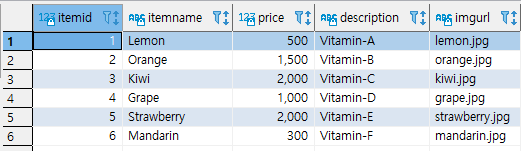

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

path = "/content/Create table.png"
db = cv2.imread(path)
cv2_imshow(db)

## 2) REST API Server
- ```pymysql``` 설치
- ```db.py``` 파일을 만들고 데이터베이스 접속 메소드와 연결 해제 및 전체 데이터를 가져와서 리턴해주는 메소드를 생성

In [ ]:
# On terminal
pip install pymysql

In [ ]:
# db.py

# 통신에 필요한 함수 작성

import pymysql

class Dao:
    # 데이터베이스 연결 함수 
    def connect(self):
        self.con = pymysql.connect(host='localhost',
                                   post=3306,
                                   user='root',
                                   password=1234,
                                   db='db',
                                   charset='utf8')
        # 데이터베이스 사용 객체 생성
        self.cursor = self.con.cursor()

    def close(self):
        self.con.close()

In [ ]:
    # 데이터 전부 가져오기
    def selectall(self):
        # 데이터베이스 연결
        self.connect()
        # sql 스크립트 실행
        self.cursor.execute("select * from item")
        # 데이터를 읽어 들여옴(튜플의 튜플로 가져옴)
        data = self.cursor.fetchall()

        # 데이터 저장용 리스트 
        li = []

        for d in data:
            dic = {}
            dic['itemid'] = d[0]
            dic['itemname'] = d[1]
            dic['price'] = d[2]
            dic['description'] = d[3]
            dic['pictureurl'] = d[4]
            li.append(dic)

        self.close()
        return li

In [ ]:
    # 데이터 삽입
    def insertitem(self, item):
        # 아이템 아이디 생성
        self.connect()
        self.cursor.execute('select max(itemid) from item')
        data = self.cursor.fetchone()
        itemid = 1

        # if there is data,  itemid + 1
        if data[0] != None:
            itemid = int(data[0]) + 1

        # 결과 저장용 변수 
        result = False

        try:
            self.cursor.execute('insert into item values(%s, %s, %s, %s, %s',
                                (itemid, item['itemname'], item['price'], item['description'], item['imgurl']))

            # 삽입이 성공했는지 확인
            if self.cursor.rowcount >= 1:
                result = True

        except Exception as e:
            result = False

        self.con.commit()
        self.close()
        return result

## 3) 파이썬 Flask 서버


In [ ]:
from flask import Flask, request
from flask import render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

import db
from flask import jsonify

@app.route('/item')
def item():
    dao = db.Dao()
    data = dao.selectall()
    # json 데이터는 리스트로 보내지 말고 딕트로 바꿔줄 것을 권장
    response = {'result':True, 'data':data}
    return jsonify(response)

# 서버 실행
app.run(host='0.0.0.0', debug=True)

## 4) 이미지 올리기/내려받기
이미지 업로드 다운로드를 위한 디렉토리 생성 
- 프로젝트에 ```static``` 폴더, 그 안에  ```image``` 폴더 생성
  - ```statc < img``` 경로에 이미지 사진 저장 

(-0.5, 447.5, 291.5, -0.5)

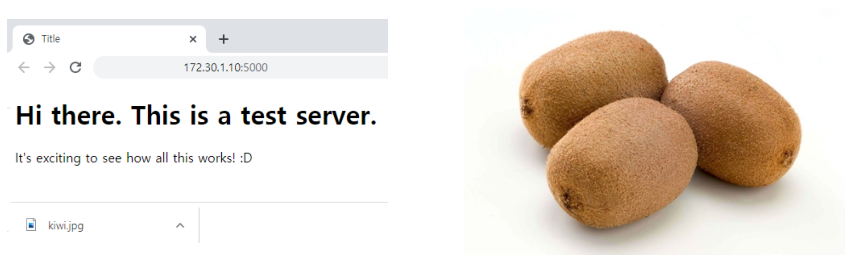

In [ ]:
import matplotlib.pyplot as plt

path0 = "/content/03 download successful.png"
path1 = "/content/kiwi.jpg"
img0 = cv2.imread(path0)
img0 = cv2.cvtColor(img0, cv2.COLOR_RGB2BGR)
img1 = cv2.imread(path1)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(img0)
ax[0].axis('off')
ax[1].imshow(img1)
ax[1].axis('off')

# 오류 공책

데이터를 가져올 때 테이블의 ID와 딕셔너리의 키 값이 일치하는지 반드시 확인할 것. 그렇지 않으면 오류나기 십상 ㅇㅅㅇ)...

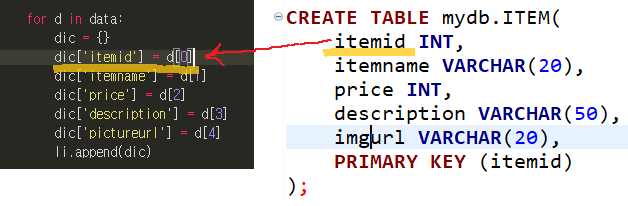

In [ ]:
path = "/content/database and dict match.png"
fetch_match = cv2.imread(path)
cv2_imshow(fetch_match)